## Диагностика и кривые обучения
### Хамикоева Ольга, ПИ19-3

##### Задания для выполнения
1. Загрузите датасет breast_cancer.
2. Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.
3. Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.
4. Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.
5. Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):
* собрать больше объектов наблюдения;
* провести обучение на меньшем объеме данных;
* исключить часть признаков из модели;
* добавить новые признаки в модель;
* добавить полиномиальные признаки;
* попробовать более сложные модели;
* попробовать более простые модели;
* увеличить регуляризацию модели;
* уменьшить регуляризацию модели;
6. Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.
7. Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?
8. Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.
9. Найдите методом подбора оптимальное значение параметра регуляризации (примерное).
10. Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.


In [1]:
# здесь будут находиться все наши импорты
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import pandas as pd
from sklearn.neural_network import MLPClassifier
from tqdm.notebook import tqdm

In [2]:
#загружаем данные
breast_cancer = load_breast_cancer()
#определяем нужные данные
X = breast_cancer.data
y = breast_cancer.target

In [3]:
print(f'Количество точек по X: {X.shape}')

Количество точек по X: (569, 30)


In [4]:
print(f'Количество точек по y: {y.shape}')

Количество точек по y: (569,)


In [5]:
#выбираем два первых признака для уменьшения размерности задачи
X_2d = X[:, :2]

In [6]:
# Теперь смотрим, как изменилась размерность выборки:
print(f'Количество точек по X: {X_2d.shape}')

Количество точек по X: (569, 2)


In [7]:
# Разделим выборку на обучающую и тестовую в пропорциях 80/20
X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size = 0.2, random_state = True)

In [8]:
#построение первого классификатора - классификатор опорных векторов с гауссовым ядром с параметром регуляризации C=0.01
#Оценка его точности даст нам приблизительную оценку уровня общей эффективности простых неоптимизированных моделей
clf = SVC(C=0.01)
clf.fit(X_train, y_train) #обучение
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7384615384615385
0.6929824561403509


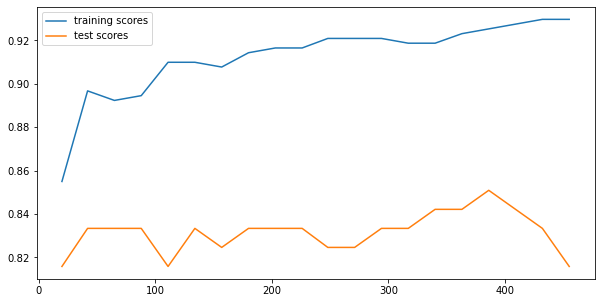

In [9]:
#построим обучение в цикле

training_scores = []
test_scores = []
numbers = []
 
for i in np.linspace(20, len(X_train), 20):
    
    clf = SVC(C=10, kernel='rbf')
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    
    numbers.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(10, 5))
plt.plot(numbers, training_scores, label="training scores")
plt.plot(numbers, test_scores, label="test scores")
_ = plt.legend(loc="best")

Точность на тестовой выборке намного ниже, чем на обучающей. Причем с увеличением объема точность на обучающей выборке растет сначала резко, затем все с меньшей скоростью, а на тестовой выборке точность с увеличением объема практически не меняется, а к концу резко падает. Для улучшения модели можно собрать больше объектов наблюдения, провести тесты на значимость модели в целом и каждого признака, на основе которых выбрать наиболее значимые признаки и строить модель на них. Нужно попробовать более простую модель, а также увеличить регуляризацию. В данном случае видно переобучение модели.

In [10]:
# Попробуем выбрать признаки на основе коррелционной матрицы, чтобы выбрать наиболее значимые из них
X_corr, y_corr = load_breast_cancer(return_X_y=True)

In [11]:
#Запишем это в более удобный формат
corr_m = pd.concat([pd.Series(y_corr, name='target'), pd.DataFrame(X_corr)], axis=1).corr().abs()
corr_m

,target,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
0,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
1,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
2,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
3,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
4,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
5,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
6,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
7,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
8,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [12]:
# отсортируем
corr_m.sort_values('target', ascending=False)

,target,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
27,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,...,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
22,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,0.219169,...,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
7,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
20,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,0.185728,...,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
2,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
23,0.733825,0.941082,0.343546,0.941550,0.959213,0.206718,0.509604,0.675987,0.809630,0.177193,...,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
0,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
3,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
6,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930


In [13]:
# Мы видим из корреляционной матрицы, что наиболее значимые параметры под номерами 27 и 22
# Возьмем параметры с номерами 27 и 22 и вновь обозначим обучающую и тестовую выборки
X_new = X_corr[:, [22, 27]]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_corr, test_size=0.2)

In [14]:
clf = SVC(C=0.01)
clf.fit(X_train_new, y_train_new)
print(f'test accuracy new: {clf.score(X_test_new, y_test_new)}')
print(f'train accuracy new: {clf.score(X_train_new, y_train_new)}')

test accuracy new: 0.7280701754385965
train accuracy new: 0.7714285714285715


Видим, что точность увеличилась

In [15]:
# Попробуем поменять использованную модель
mlp = MLPClassifier(solver='lbfgs', activation='logistic', alpha=10.0, max_iter=100)
mlp.fit(X_train, y_train)
print(f'test accuracy with new model: {mlp.score(X_test, y_test)}')
print(f'train accuracy with new model: {mlp.score(X_train, y_train)}')

test accuracy with new model: 0.8421052631578947
train accuracy with new model: 0.8945054945054945


C:\Users\olga.khamikoeva\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Точность увеличилась значительно

In [16]:
# попробуем увеличить регуляризацию
clf = SVC(C=1)
clf.fit(X_train, y_train)
print(f'test accuracy with increase regularization: {clf.score(X_test, y_test)}')
print(f'train accuracy with increase regularization: {clf.score(X_train, y_train)}')

test accuracy with increase regularization: 0.8333333333333334
train accuracy with increase regularization: 0.9274725274725275


Увеличение регуляризации, как можно видеть, тоже положительно повлияло на точность модели.

In [17]:
# Построим модель с разными значениями C, накопим оценки, по итогу построим график оценок
#Где по оси X значения C
def regularization(sample, kernel_val):
    
    test_scores = []
    train_scores = []
    numbers = []

    for i in tqdm(sample):
        clf = SVC(C=i, kernel=kernel_val)
        clf.fit(X_train, y_train)

        test_scores.append(clf.score(X_test, y_test))
        train_scores.append(clf.score(X_train, y_train))

    ax = plt.axes()
    ax.plot(sample, test_scores, label="test")
    ax.plot(sample, train_scores, label="train")
    ax.set_xlabel('С')
    ax.set_ylabel('score')
    ax.set_ylim([0.75, 1])
    ax.legend()
    return test_scores, train_scores

  0%|          | 0/50 [00:00<?, ?it/s]

0.8421052631578947

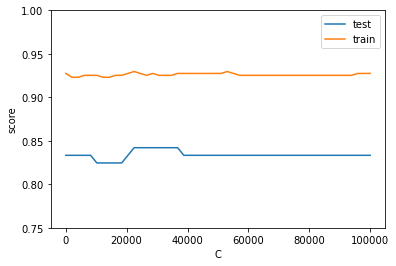

In [18]:
scores, i = regularization(np.linspace(1, 100000, 50), 'rbf')
max(scores)

  0%|          | 0/500 [00:00<?, ?it/s]

0.8508771929824561

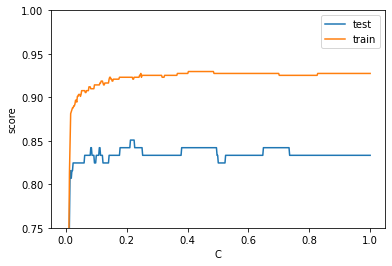

In [19]:
scores, i = regularization(np.linspace(0.0001, 1, 500), 'rbf')
max(scores)

Чем больше значение С, тем больше модель переобучается, а с малым модель недообучается. 

Чем выше параметр параметра регуляризации С, тем выше точность модели на тренировочных данных и ниже на тестовых.

  0%|          | 0/100 [00:00<?, ?it/s]

0.8421052631578947

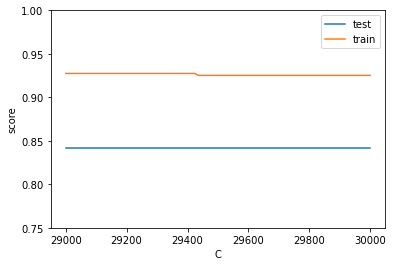

In [26]:
#Найдите методом подбора оптимальное значение параметра регуляризации:
# Сузим промежуток 
scores, i = regularization(np.linspace(29000, 30000, 100), 'rbf')
max(scores)

In [28]:
# Возьмем C=29200 и построим относительно него
clf = SVC(kernel='rbf', C=29200)
clf.fit(X_train, y_train)
print(f'test accuracy with C = 0.4: {clf.score(X_test, y_test)}')
print(f'train accuracy with C = 0.4: {clf.score(X_train, y_train)}')

test accuracy with C = 0.4: 0.8421052631578947
train accuracy with C = 0.4: 0.9274725274725275


Таким образом модель имеет более-менее нормальную точность

  0%|          | 0/50 [00:00<?, ?it/s]

0.868421052631579

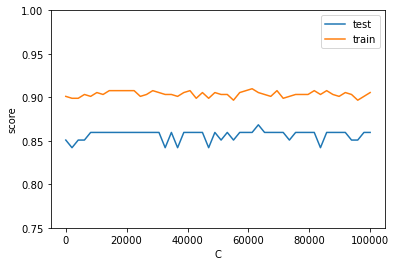

In [22]:
# Проведем то же самое для метода опорных векторов с линейным ядром
scores, i = regularization(np.linspace(1, 100000, 50), 'linear')
max(scores)

  0%|          | 0/10 [00:00<?, ?it/s]

0.8596491228070176

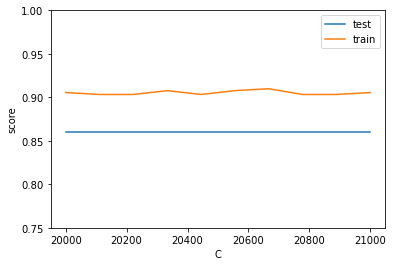

In [33]:
# вновь сужаем промежуток
scores, i = regularization(np.linspace(20000, 21000, 10), 'linear')
max(scores)

In [34]:
#Таким образом выбираем параметр 20600
clf = SVC(kernel='linear', C=20600)
clf.fit(X_train, y_train)
print(f'test accuracy linear: {clf.score(X_test, y_test)}')
print(f'train accuracy linear: {clf.score(X_train, y_train)}')

test accuracy linear: 0.8596491228070176
train accuracy linear: 0.9032967032967033


### Вывод
Модели примерно одинаковые, что можно заметить по параметру accuracy.